In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATFocus, nets
from NEATModels.config import dynamic_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"


Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/CurieTrainingDatasets/foconeatnpz/'
npz_name = 'Foconeat.npz'
npz_val_name = 'FoconeatVal.npz'

#Read and Write the h5 file, directory location and name
model_dir =  '/home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/'
model_name = 'cadhistoned29s4f16resmulti.h5'

In [3]:
#Neural network parameters
focus_categories_json = model_dir + 'FocusCategories.json'
key_categories = load_json(focus_categories_json)
focus_cord_json = model_dir + 'FocusCord.json'
key_cord = load_json(focus_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 16
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7

mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-3
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 10

#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
show = True
stage_number = 4
last_conv_factor = 8
size_tminus = 1
size_tplus = 1
imagex = 96
imagey = 96
multievent = True

In [4]:

config = dynamic_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord,  imagex = imagex,
                         imagey = imagey, size_tminus = size_tminus, size_tplus =size_tplus, epochs = epochs, multievent = multievent,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel, stage_number = stage_number, last_conv_factor = last_conv_factor,
                         show = show, startfilter = startfilter, batch_size = batch_size, model_name = model_name)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

dynamic_config(batch_size=10, box_vector=6, categories=3, depth=29, epochs=250, imagex=96, imagey=96, key_categories={'Totaloff': 0, 'BestCad': 1, 'BestNuclei': 2}, key_cord={'x': 0, 'y': 1, 'z': 2, 'h': 3, 'w': 4, 'c': 5}, last_conv_factor=8, learning_rate=0.0001, lstm_hidden_unit=16, lstm_kernel=3, mid_kernel=3, model_name='cadhistoned29s4f16resmulti.h5', multievent=True, nboxes=1, npz_directory='/home/sancere/Kepler/CurieTrainingDatasets/foconeatnpz/', npz_name='Foconeat.npz', npz_val_name='FoconeatVal.npz', residual=True, show=True, size_tminus=1, size_tplus=1, stage_number=4, start_kernel=7, startfilter=16, stride=8, yolo_v0=True, yolo_v1=False, yolo_v2=False)


number of  images:	 10819
image size (3D):		 (3, 96, 96)
axes:				 SZYXC
channels in / out:		 1
number of  images:	 570
image size (3D):		 (3, 96, 96)
axes:				 SZYXC
channels in / out:		 1
(3, 96, 96, 1)
sigmoid


2021-08-27 12:12:06.352713: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-08-27 12:12:06.423002: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:73:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2021-08-27 12:12:06.423256: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-08-27 12:12:06.424593: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-08-27 12:12:06.426027: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021-08-27 12:12:06.426312: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, None, None 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 3, None, None 5504        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 3, None, None 64          conv3d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 3, None, None 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

Train on 10819 samples, validate on 570 samples
Epoch 1/250


2021-08-27 12:12:26.290280: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-08-27 12:12:27.535739: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


10819/10819 [==============================] - 180s 17ms/step - loss: 1.5148 - accuracy: 0.0165 - val_loss: 1.9412 - val_accuracy: 0.0035

Epoch 00001: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


<Figure size 432x288 with 0 Axes>

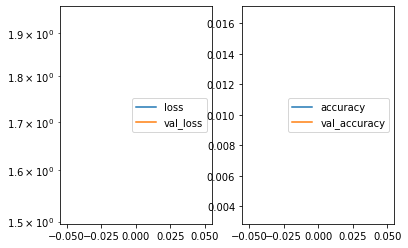

[[2.7253979e-01 7.2743845e-01 2.1782875e-05 4.8774600e-01 5.1367468e-01
  5.6280982e-01 9.9999952e-01 9.9999559e-01 7.2991627e-01]]
True Cell type: Totaloff
x [[[0.487746]]]
True positional value x 0.5
y [[[0.5136747]]]
True positional value y 0.5
z [[[0.5628098]]]
True positional value z 0.5
h [[[0.9999995]]]
True positional value h 1.0
w [[[0.9999956]]]
True positional value w 1.0
c [[[0.7299163]]]
True positional value c 1.0


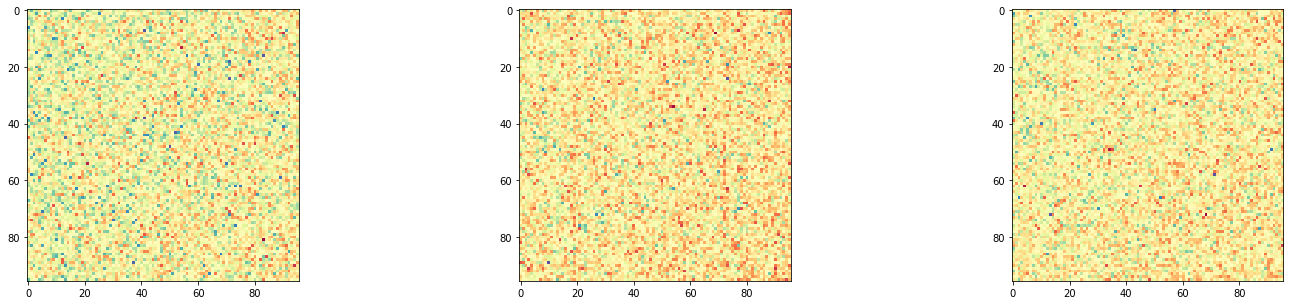

Epoch 2/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.3543 - accuracy: 0.1163 - val_loss: 1.3301 - val_accuracy: 0.2386

Epoch 00002: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


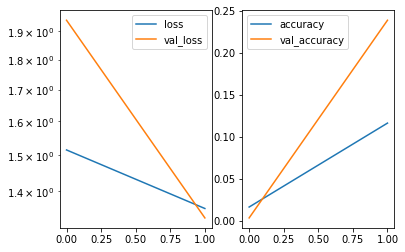

[[9.9986863e-01 1.3131498e-04 1.8829282e-11 4.9170631e-01 4.8697618e-01
  4.7509974e-01 9.9999905e-01 9.9999285e-01 7.6380420e-01]]
True Cell type: Totaloff
x [[[0.4917063]]]
True positional value x 0.5
y [[[0.48697618]]]
True positional value y 0.5
z [[[0.47509974]]]
True positional value z 0.5
h [[[0.99999905]]]
True positional value h 1.0
w [[[0.99999285]]]
True positional value w 1.0
c [[[0.7638042]]]
True positional value c 1.0


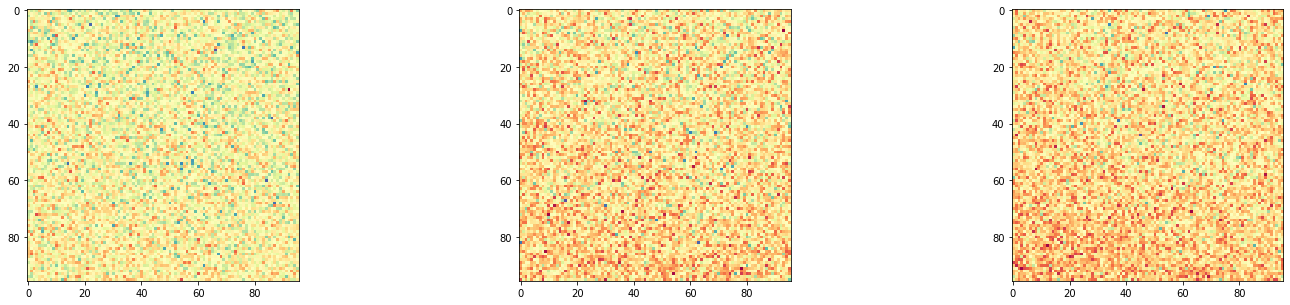

Epoch 3/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.3350 - accuracy: 0.2143 - val_loss: 1.3284 - val_accuracy: 0.0772

Epoch 00003: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


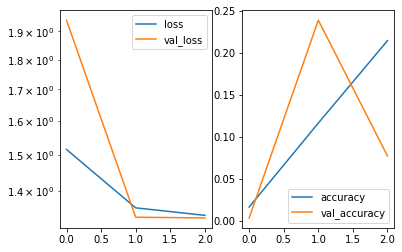

[[9.9981958e-01 1.8041188e-04 2.9828644e-09 5.1510495e-01 5.0788260e-01
  5.0425345e-01 9.9999917e-01 9.9999452e-01 7.5101453e-01]]
True Cell type: Totaloff
x [[[0.51510495]]]
True positional value x 0.5
y [[[0.5078826]]]
True positional value y 0.5
z [[[0.50425345]]]
True positional value z 0.5
h [[[0.99999917]]]
True positional value h 1.0
w [[[0.9999945]]]
True positional value w 1.0
c [[[0.75101453]]]
True positional value c 1.0


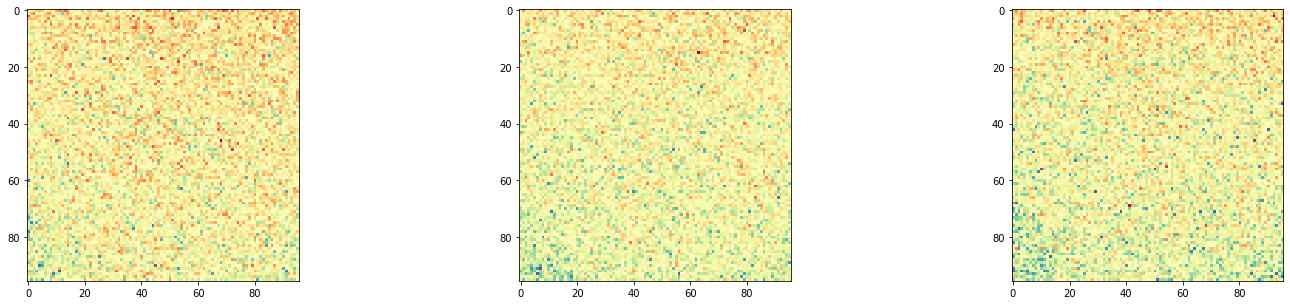

Epoch 4/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.3246 - accuracy: 0.2691 - val_loss: 1.3304 - val_accuracy: 0.0825

Epoch 00004: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


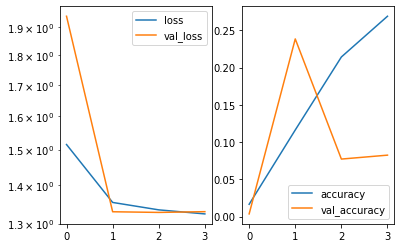

[[9.9599224e-01 4.0035699e-03 4.1239709e-06 4.9321890e-01 5.0356477e-01
  5.2171206e-01 9.9999702e-01 9.9998152e-01 7.4362177e-01]]
True Cell type: Totaloff
x [[[0.4932189]]]
True positional value x 0.5
y [[[0.5035648]]]
True positional value y 0.5
z [[[0.52171206]]]
True positional value z 0.5
h [[[0.999997]]]
True positional value h 1.0
w [[[0.9999815]]]
True positional value w 1.0
c [[[0.74362177]]]
True positional value c 1.0


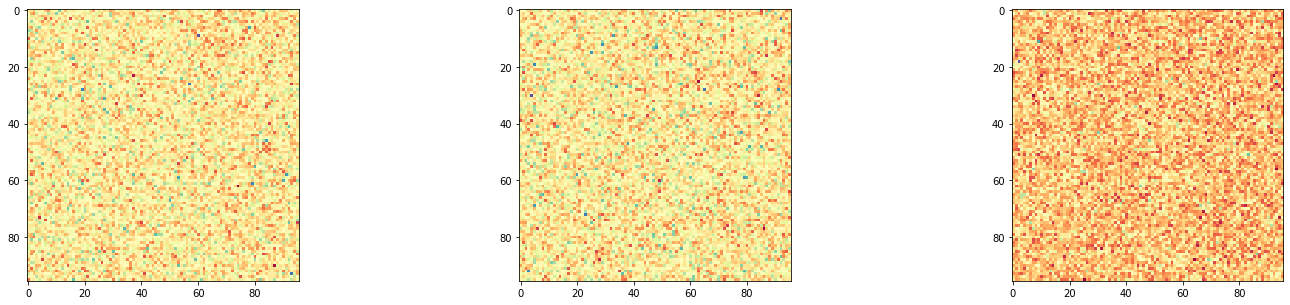

Epoch 5/250
10819/10819 [==============================] - 168s 16ms/step - loss: 1.3150 - accuracy: 0.4098 - val_loss: 1.3090 - val_accuracy: 0.7930

Epoch 00005: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


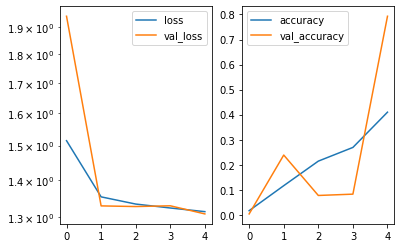

Predicted cell: Totaloff Probability: [[[[1.0000000e+00 4.2048574e-09 2.0526695e-11 5.0254714e-01
    4.8372209e-01 4.9461436e-01 9.9999869e-01 9.9998999e-01
    7.2633934e-01]]]]
True Cell type: Totaloff
x [[[0.50254714]]]
True positional value x 0.5
y [[[0.4837221]]]
True positional value y 0.5
z [[[0.49461436]]]
True positional value z 0.5
h [[[0.9999987]]]
True positional value h 1.0
w [[[0.99999]]]
True positional value w 1.0
c [[[0.72633934]]]
True positional value c 1.0


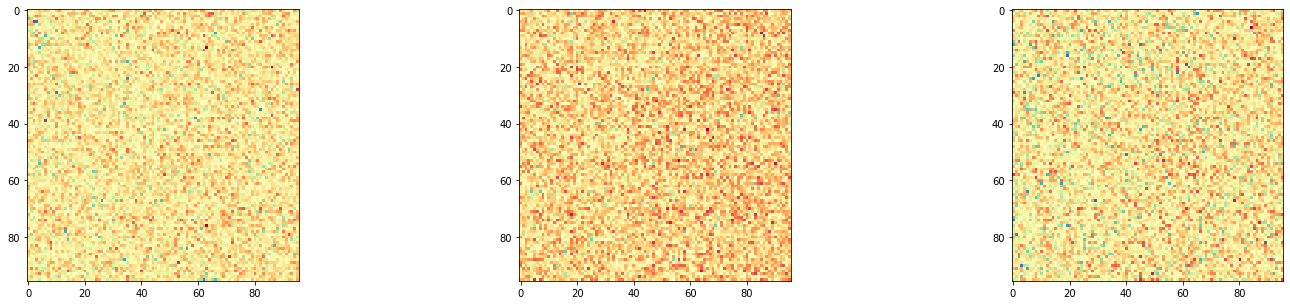

Epoch 6/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.3074 - accuracy: 0.5273 - val_loss: 1.3145 - val_accuracy: 0.1175

Epoch 00006: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


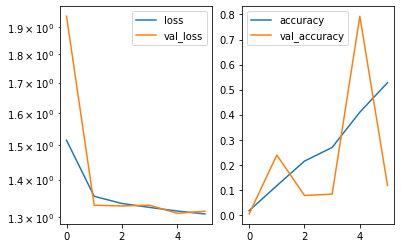

[[9.9999785e-01 2.1246890e-06 4.3622685e-14 4.7476444e-01 4.9767590e-01
  4.9651200e-01 9.9999976e-01 9.9999738e-01 7.7547586e-01]]
True Cell type: Totaloff
x [[[0.47476444]]]
True positional value x 0.5
y [[[0.4976759]]]
True positional value y 0.5
z [[[0.496512]]]
True positional value z 0.5
h [[[0.99999976]]]
True positional value h 1.0
w [[[0.9999974]]]
True positional value w 1.0
c [[[0.77547586]]]
True positional value c 1.0


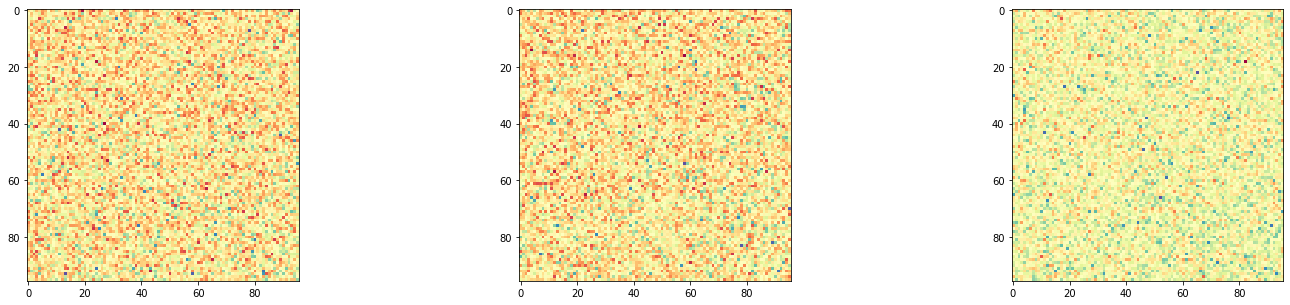

Epoch 7/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.3030 - accuracy: 0.4591 - val_loss: 1.7835 - val_accuracy: 0.1140

Epoch 00007: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


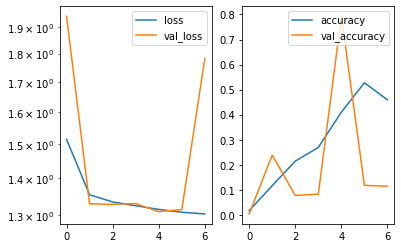

[[2.0412114e-04 9.9979573e-01 8.3849919e-08 4.9778906e-01 4.9091211e-01
  5.0512201e-01 9.9997783e-01 9.9989009e-01 7.2740638e-01]]
True Cell type: BestCad
x [[[0.49778906]]]
True positional value x 0.5
y [[[0.4909121]]]
True positional value y 0.5
z [[[0.505122]]]
True positional value z 0.5
h [[[0.9999778]]]
True positional value h 1.0
w [[[0.9998901]]]
True positional value w 1.0
c [[[0.7274064]]]
True positional value c 1.0


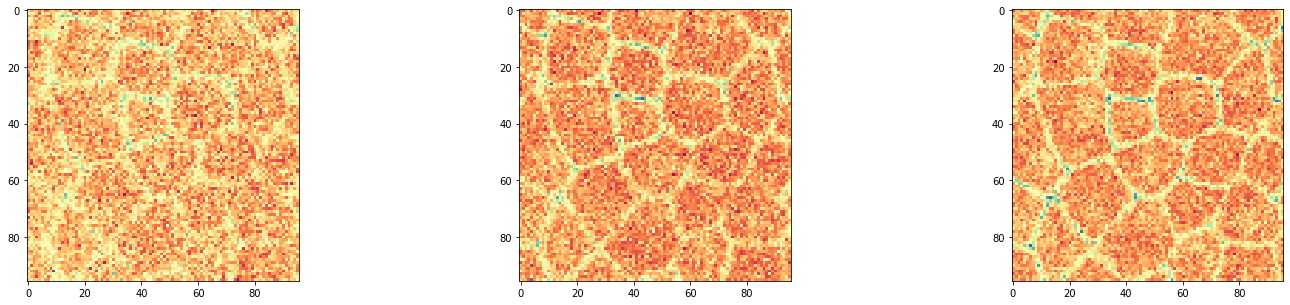

Epoch 8/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.3013 - accuracy: 0.3658 - val_loss: 1.2911 - val_accuracy: 0.7947

Epoch 00008: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


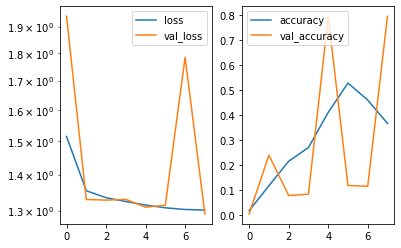

Predicted cell: Totaloff Probability: [[[[9.9999905e-01 8.9693106e-07 2.1052799e-08 5.1284373e-01
    5.0520742e-01 4.9737650e-01 9.9999857e-01 9.9998915e-01
    7.4852407e-01]]]]
True Cell type: Totaloff
x [[[0.5128437]]]
True positional value x 0.5
y [[[0.5052074]]]
True positional value y 0.5
z [[[0.4973765]]]
True positional value z 0.5
h [[[0.99999857]]]
True positional value h 1.0
w [[[0.99998915]]]
True positional value w 1.0
c [[[0.74852407]]]
True positional value c 1.0


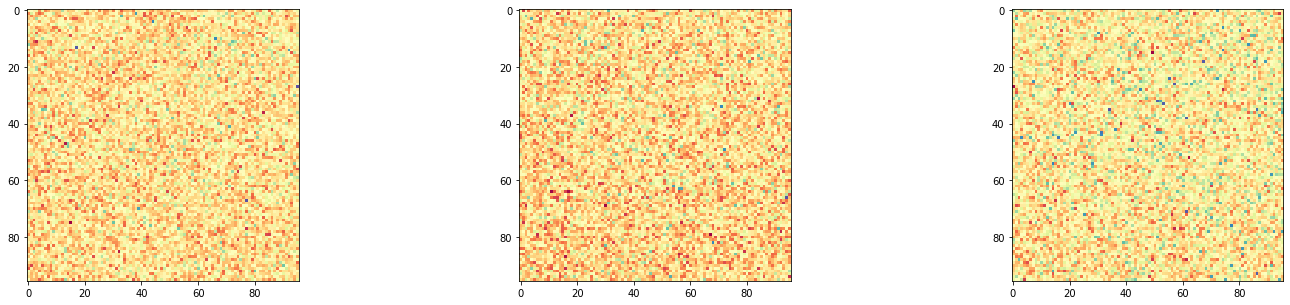

Epoch 9/250
10819/10819 [==============================] - 168s 16ms/step - loss: 1.2900 - accuracy: 0.4651 - val_loss: 1.2842 - val_accuracy: 0.8246

Epoch 00009: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


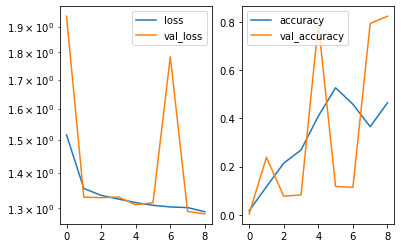

Predicted cell: Totaloff Probability: [[[[1.0000000e+00 5.6444159e-12 5.6983234e-14 5.0134939e-01
    4.9755052e-01 5.0172156e-01 9.9999988e-01 9.9999833e-01
    8.0031139e-01]]]]
True Cell type: Totaloff
x [[[0.5013494]]]
True positional value x 0.5
y [[[0.49755052]]]
True positional value y 0.5
z [[[0.50172156]]]
True positional value z 0.5
h [[[0.9999999]]]
True positional value h 1.0
w [[[0.99999833]]]
True positional value w 1.0
c [[[0.8003114]]]
True positional value c 1.0


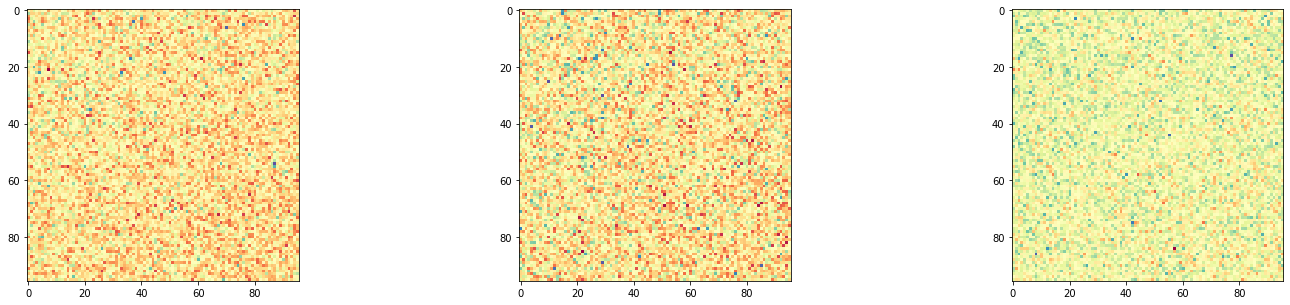

Epoch 10/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2838 - accuracy: 0.5033 - val_loss: 1.2775 - val_accuracy: 0.6316

Epoch 00010: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


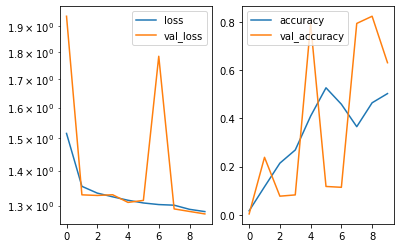

[[9.9999416e-01 5.8311921e-06 1.5959968e-08 4.8961717e-01 5.0386292e-01
  4.9308339e-01 9.9999690e-01 9.9997914e-01 7.5533086e-01]]
True Cell type: Totaloff
x [[[0.48961717]]]
True positional value x 0.5
y [[[0.5038629]]]
True positional value y 0.5
z [[[0.4930834]]]
True positional value z 0.5
h [[[0.9999969]]]
True positional value h 1.0
w [[[0.99997914]]]
True positional value w 1.0
c [[[0.75533086]]]
True positional value c 1.0


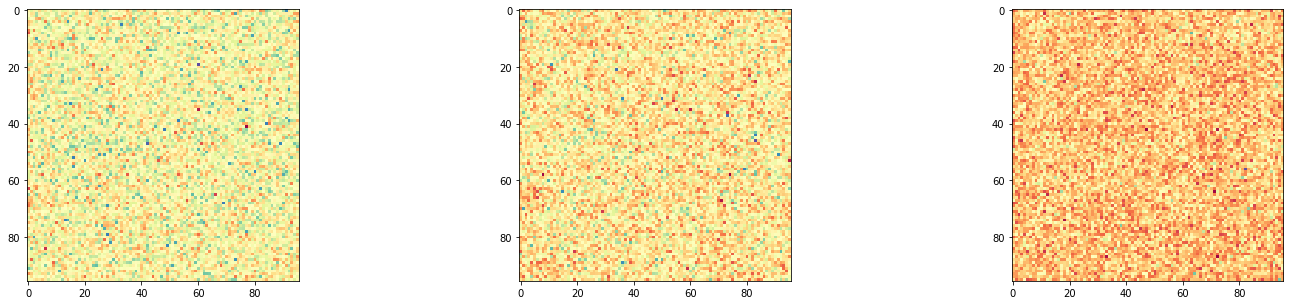

Epoch 11/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2763 - accuracy: 0.6215 - val_loss: 1.2726 - val_accuracy: 0.8509

Epoch 00011: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


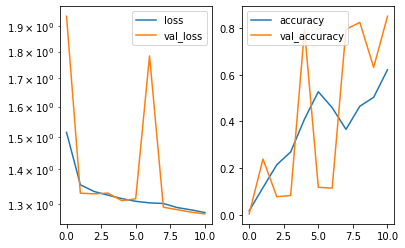

Predicted cell: Totaloff Probability: [[[[1.0000000e+00 1.0606727e-10 2.1932798e-12 5.0205690e-01
    5.0051397e-01 5.1190650e-01 9.9999797e-01 9.9998593e-01
    7.7082628e-01]]]]
True Cell type: Totaloff
x [[[0.5020569]]]
True positional value x 0.5
y [[[0.500514]]]
True positional value y 0.5
z [[[0.5119065]]]
True positional value z 0.5
h [[[0.999998]]]
True positional value h 1.0
w [[[0.99998593]]]
True positional value w 1.0
c [[[0.7708263]]]
True positional value c 1.0


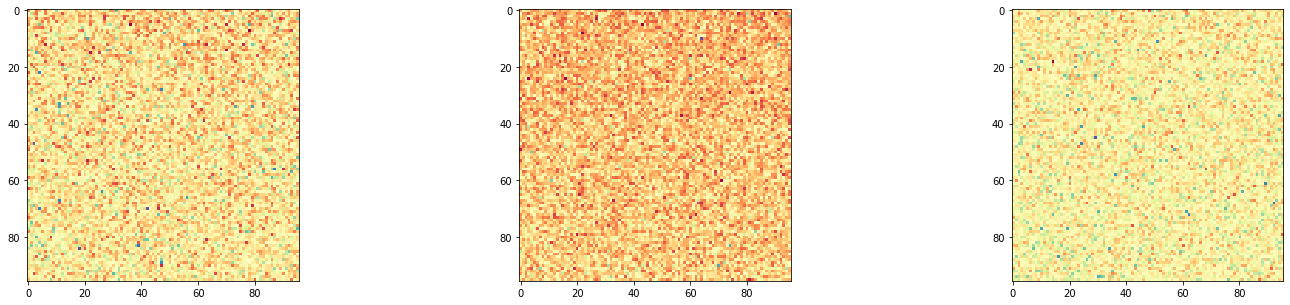

Epoch 12/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2705 - accuracy: 0.6792 - val_loss: 1.2670 - val_accuracy: 0.6140

Epoch 00012: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


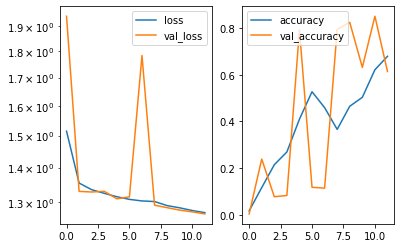

[[2.8843261e-04 9.9970967e-01 1.9521760e-06 4.9279791e-01 5.1671851e-01
  5.0705898e-01 9.9994028e-01 9.9973851e-01 7.0048726e-01]]
True Cell type: BestCad
x [[[0.4927979]]]
True positional value x 0.5
y [[[0.5167185]]]
True positional value y 0.5
z [[[0.507059]]]
True positional value z 0.5
h [[[0.9999403]]]
True positional value h 1.0
w [[[0.9997385]]]
True positional value w 1.0
c [[[0.70048726]]]
True positional value c 1.0


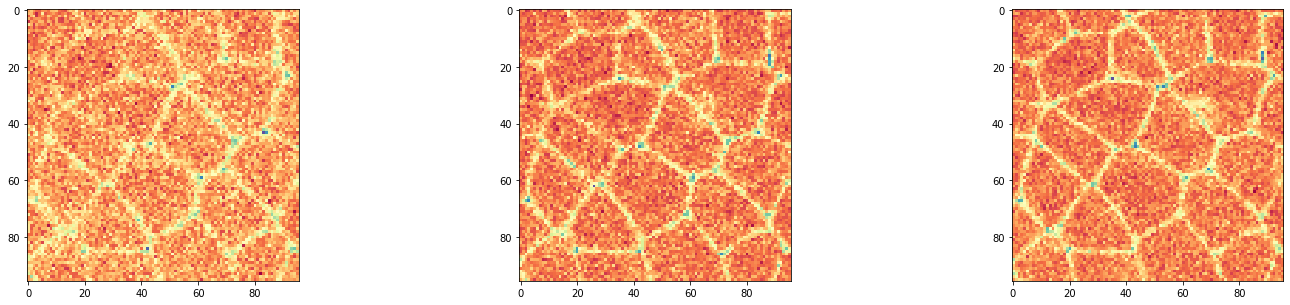

Epoch 13/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2636 - accuracy: 0.5985 - val_loss: 1.2615 - val_accuracy: 0.7351

Epoch 00013: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


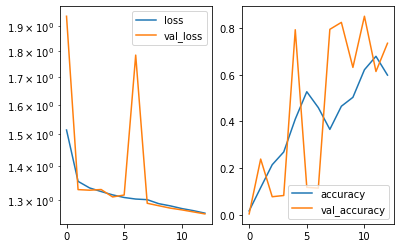

[[2.6683129e-09 1.6320694e-08 1.0000000e+00 5.0373614e-01 5.0229532e-01
  4.9230030e-01 9.9996591e-01 9.9984586e-01 7.2071999e-01]]
True Cell type: BestNuclei
x [[[0.50373614]]]
True positional value x 0.5
y [[[0.5022953]]]
True positional value y 0.5
z [[[0.4923003]]]
True positional value z 0.5
h [[[0.9999659]]]
True positional value h 1.0
w [[[0.99984586]]]
True positional value w 1.0
c [[[0.72072]]]
True positional value c 1.0


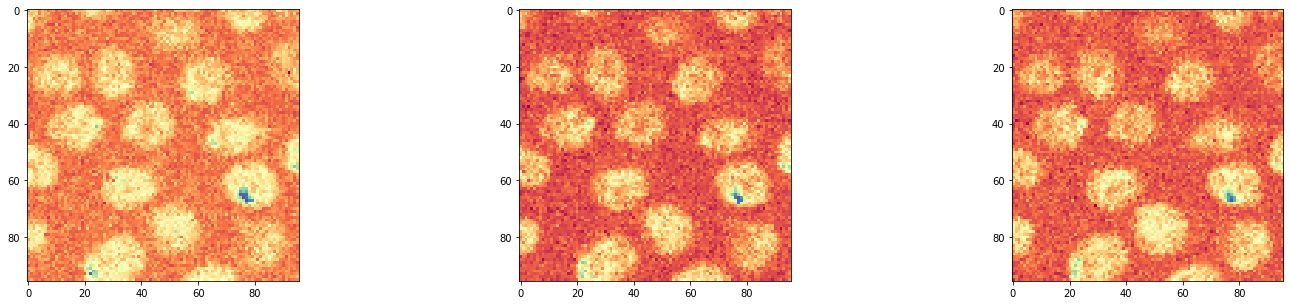

Epoch 14/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2581 - accuracy: 0.6794 - val_loss: 1.2554 - val_accuracy: 0.8667

Epoch 00014: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


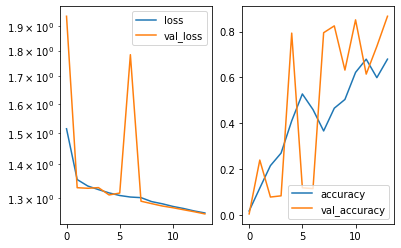

[[1.1323125e-05 9.9998844e-01 2.6332353e-07 4.9366021e-01 4.8524496e-01
  5.1004148e-01 9.9996328e-01 9.9981755e-01 7.1330267e-01]]
True Cell type: BestCad
x [[[0.4936602]]]
True positional value x 0.5
y [[[0.48524496]]]
True positional value y 0.5
z [[[0.5100415]]]
True positional value z 0.5
h [[[0.9999633]]]
True positional value h 1.0
w [[[0.99981755]]]
True positional value w 1.0
c [[[0.7133027]]]
True positional value c 1.0


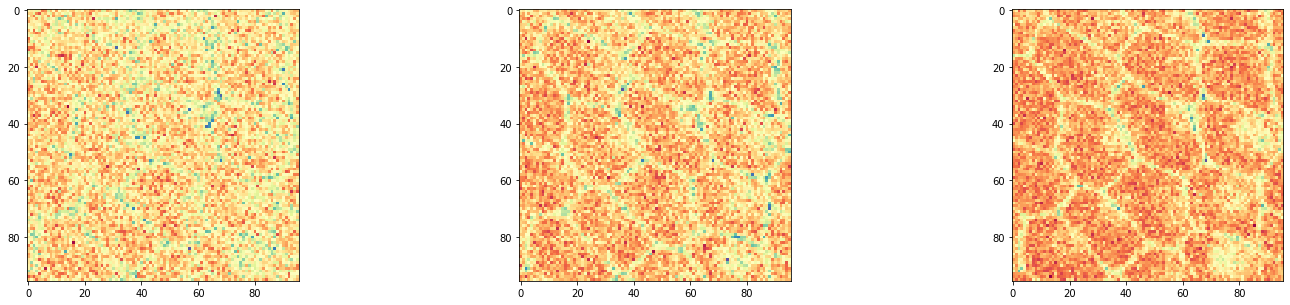

Epoch 15/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2559 - accuracy: 0.6740 - val_loss: 1.3035 - val_accuracy: 0.8404

Epoch 00015: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


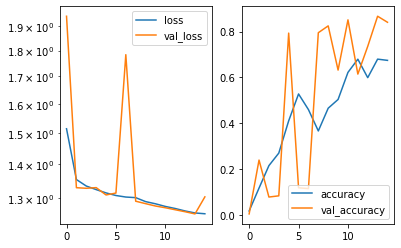

[[0.0231599  0.9478106  0.02902951 0.49269852 0.49026257 0.48463807
  0.99998045 0.99988675 0.7092473 ]]
True Cell type: BestCad
x [[[0.49269852]]]
True positional value x 0.5
y [[[0.49026257]]]
True positional value y 0.5
z [[[0.48463807]]]
True positional value z 0.5
h [[[0.99998045]]]
True positional value h 1.0
w [[[0.99988675]]]
True positional value w 1.0
c [[[0.7092473]]]
True positional value c 1.0


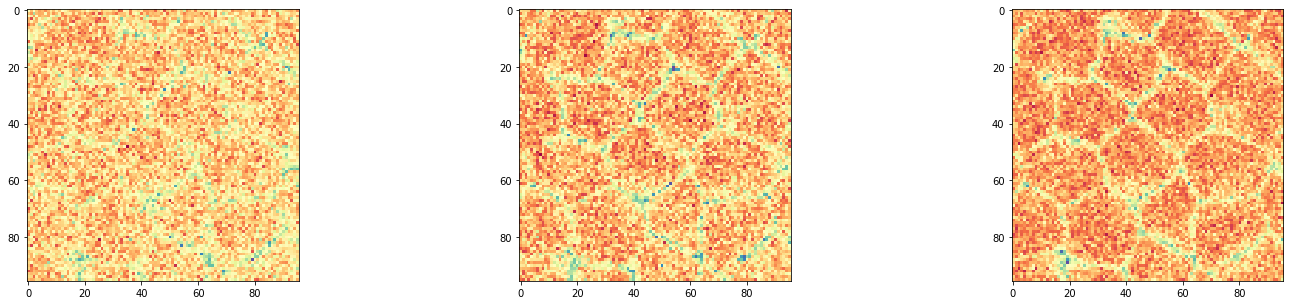

Epoch 16/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2487 - accuracy: 0.7021 - val_loss: 1.2916 - val_accuracy: 0.3614

Epoch 00016: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


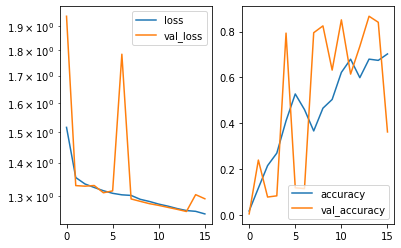

[[9.9998927e-01 1.0747595e-05 1.3034906e-08 5.0869375e-01 5.0536096e-01
  5.0621694e-01 9.9999917e-01 9.9999404e-01 7.8701717e-01]]
True Cell type: Totaloff
x [[[0.50869375]]]
True positional value x 0.5
y [[[0.50536096]]]
True positional value y 0.5
z [[[0.50621694]]]
True positional value z 0.5
h [[[0.99999917]]]
True positional value h 1.0
w [[[0.99999404]]]
True positional value w 1.0
c [[[0.78701717]]]
True positional value c 1.0


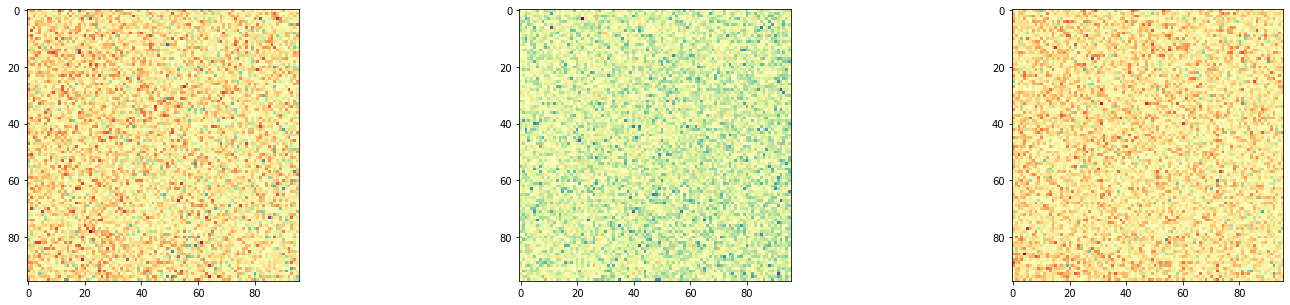

Epoch 17/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2430 - accuracy: 0.7119 - val_loss: 1.2487 - val_accuracy: 0.4386

Epoch 00017: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


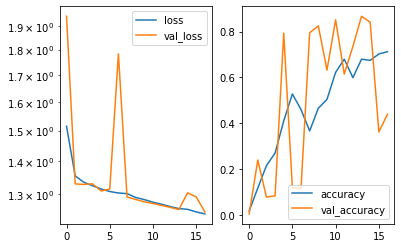

[[6.1233445e-06 9.9999392e-01 5.4780500e-09 4.9545518e-01 4.9234617e-01
  4.9871844e-01 9.9994266e-01 9.9972290e-01 6.9980705e-01]]
True Cell type: BestCad
x [[[0.49545518]]]
True positional value x 0.5
y [[[0.49234617]]]
True positional value y 0.5
z [[[0.49871844]]]
True positional value z 0.5
h [[[0.99994266]]]
True positional value h 1.0
w [[[0.9997229]]]
True positional value w 1.0
c [[[0.69980705]]]
True positional value c 1.0


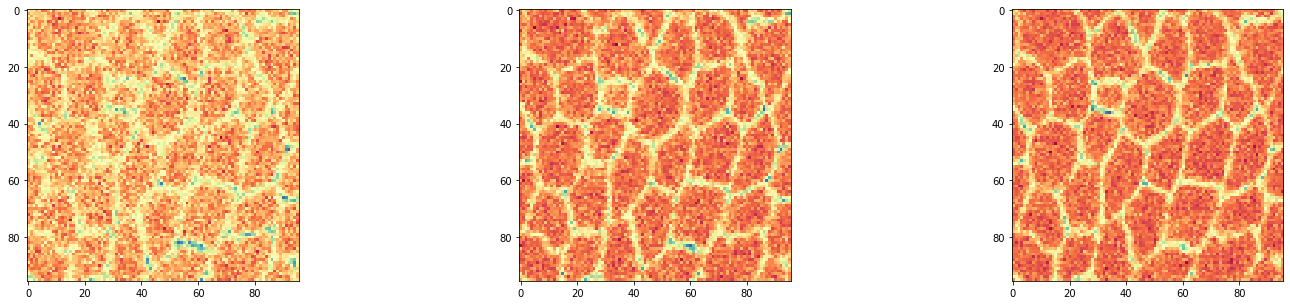

Epoch 18/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2388 - accuracy: 0.7412 - val_loss: 2.5933 - val_accuracy: 0.1456

Epoch 00018: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


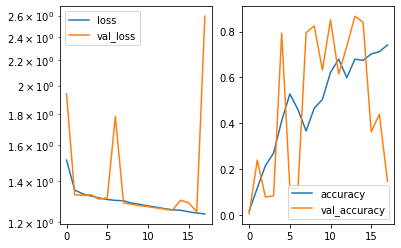

[[5.4761279e-01 2.3930219e-04 4.5214784e-01 4.9978098e-01 5.0440681e-01
  5.0109911e-01 9.9999070e-01 9.9995434e-01 7.2995996e-01]]
True Cell type: Totaloff
x [[[0.49978098]]]
True positional value x 0.5
y [[[0.5044068]]]
True positional value y 0.5
z [[[0.5010991]]]
True positional value z 0.5
h [[[0.9999907]]]
True positional value h 1.0
w [[[0.99995434]]]
True positional value w 1.0
c [[[0.72995996]]]
True positional value c 1.0


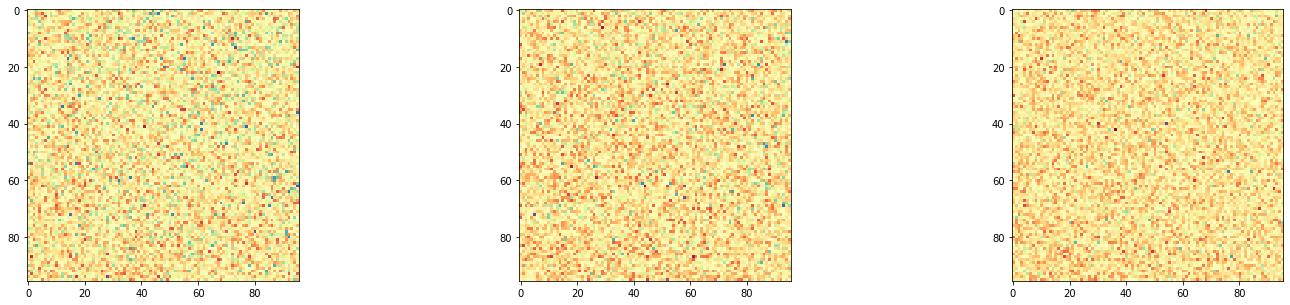

Epoch 19/250
 9490/10819 [=========================>....] - ETA: 20s - loss: 1.2335 - accuracy: 0.7168

In [ ]:
Train = NEATFocus(config, model_dir, model_name)

Train.loadData()

Train.TrainModel()